#Orthogonality

If a matrix $C$ has orthogonal cloumns, then $C^TC = I$, because 
$$C^TC = \begin{pmatrix} --- c_1 --- \\ --- c_2 --- \\ --- \vdots ---\\ --- c_k --- \end{pmatrix} \begin{pmatrix} \vdots & \vdots & \vdots & \vdots \\ c_1 & c_2 & \ldots & c_k \\ \vdots & \vdots & \vdots & \vdots\end{pmatrix} = \mathbf{I}$$ 

If a matrix $R$ has orthogonal rows, then $RR^T = I$, because 
$$RR^T = \begin{pmatrix} --- r_1 --- \\ --- r_2 --- \\ --- \vdots ---\\ --- r_k --- \end{pmatrix}  \begin{pmatrix} \vdots & \vdots & \vdots & \vdots \\ r_1 & r_2 & \ldots & r_k \\ \vdots & \vdots & \vdots & \vdots\end{pmatrix} = \mathbf{I}$$

For square matrices $A,B$, we know that if $AB=\mathbf{I}$ then $BA=\mathbf{I}$.

Therefore, if $M$ is square with orthonormal cloumns ($M^TM=\mathbf{I}$), then $MM^T = \mathbf{I}$. So $M$ also has orthonormal rows. Same goes for rows implying columns.

These are **orthogonal matrcies**. An *orthogonal matrix* is a square matrix with real entries whose columns and rows are orthogonal unit vectors (i.e., orthonormal vectors). In thise case $M^T = M^{-1}$.

#SVD - circles to ellipses

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

(-1, 1)

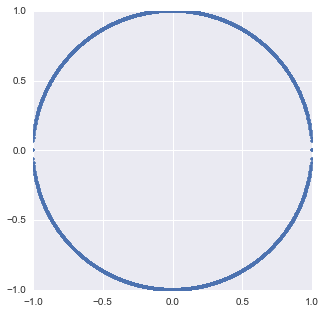

In [124]:
#generate points on a unit circle

xs = np.linspace(-1, 1, 1000)
ys = np.sqrt(1-xs**2)

xs = np.append(xs, xs)
ys = np.append(ys, -ys)

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(xs,ys,'.')

plt.xlim([-1,1])
plt.ylim([-1,1])

[[ 1.         -0.4472136 ]
 [ 0.          0.89442719]]
[ 6. -4.]


(-10, 10)

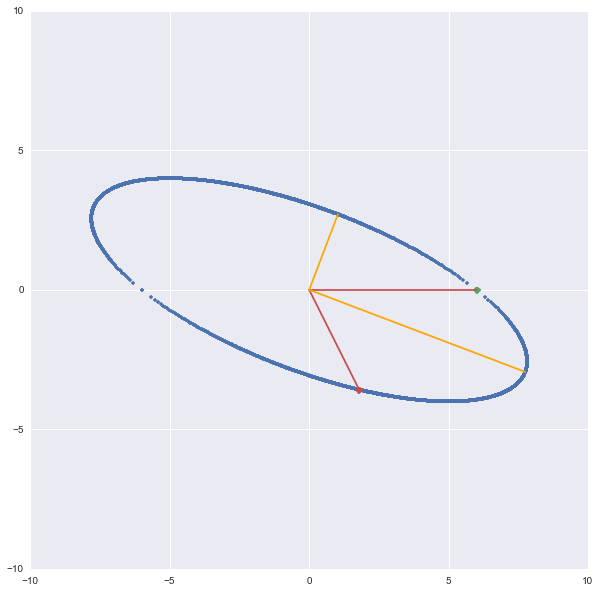

In [128]:
#map the circle via the matrix A
A = np.array([[6,5], [0,-4]])
eigenval, eigenvec = np.linalg.eig(A)
print eigenvec
print eigenval
mapped=[]
for x,y in zip(xs,ys):
    mapped.append(np.dot(A,np.array([x, y])))
#print zip(xs, ys)
#print mapped
fig, ax = plt.subplots(1,1,figsize=(10,10))
#fig = plt.figure()
#ax = fig.add_subplot(121, figsize=(10, 10))
newx = [item[0] for item in mapped]
newy = [item[1] for item in mapped]
ax.plot(newx, newy, '.')


#plot eigenvectors
eign_x1 = eigenval[0]*eigenvec[0,0]
eign_y1 = eigenval[0]*eigenvec[1,0]
eign_x2 = eigenval[1]*eigenvec[0,1]
eign_y2 =  eigenval[1]*eigenvec[1,1]

ax.plot(eign_x1, eign_y1, 'o')
ax.plot(eign_x2, eign_y2, 'o')


line = plt.Line2D([0,eign_x1], [0,eign_y1], color='r')
ax.add_line(line)
line = plt.Line2D([0,eign_x2], [0,eign_y2], color='r')
ax.add_line(line)


#SVD stuff
U, s, V = np.linalg.svd(A)
line = plt.Line2D([0,s[0]*U[0,0]], [0,s[0]*U[1,0]], color='orange')
ax.add_line(line)
line = plt.Line2D([0,s[1]*U[0,1]], [0,s[1]*U[1,1]], color='orange')
ax.add_line(line)


plt.xlim([-10,10])
plt.ylim([-10,10])

#SVD
$Av_j = \sigma_j u_j \text{ for } j=1,\ldots, n$

where

$v_j$ are the **right singular vectors** of A;

$u_j$ are the **left singular vectors** of A;

$\sigma_j$ are the **singular values** of A;

$u_j$ is a vector on the principle axis of the ellipse given by $A$; $\sigma_j$ is how much it gets stretched; $v_j$ is the vector on the unit circle that gets sent to it.

In matrix form: $$A = U \Sigma V$$

$$A^{m \times n} = U^{m \times n}\;\; \Sigma^{n \times n}\;\; V^{n \times n}$$

$\Sigma$ is diagonal;

$U$ has orthonormal columns ($\in \mathbf{R}^m$);

$V$ has orthonormal columns (and therefore rows, since it's square).

#FINDING THE SVD

##use the eigendecomposition:

$\mathbf{A}=\mathbf{Q}\mathbf{\Lambda}\mathbf{Q}^{-1}$  
where $\mathbf{Q}$ is the square matrix whose $i$th column is the eigenvector $q_i$ of $\mathbf{A}$ and $\mathbf{Λ}$ is the diagonal matrix whose diagonal elements are the corresponding eigenvalues

In [129]:
A

array([[ 6,  5],
       [ 0, -4]])

In [130]:
eigenval, eigenvec = np.linalg.eig(A)
print eigenval
print eigenvec

[ 6. -4.]
[[ 1.         -0.4472136 ]
 [ 0.          0.89442719]]


In [131]:
np.dot(np.dot(eigenvec, np.diag(eigenval)), np.linalg.inv(eigenvec))

array([[ 6.,  5.],
       [ 0., -4.]])

#How does this help?

$A = U \Sigma V$, so we use two facts, recalling that $V$ is orthnoromal ($V^{-1} = V^T$):

$$A^TA = \left(V^T \Sigma^T U^T\right)  U \Sigma V = V^T \Sigma^2 V = V \Sigma^2 V^{-1};$$


So $\Sigma$ is the square root of the diagonal eigenvalue matrix of $A^TA$, which we know how to find, and $V$ is the eigenvector matrix of $A^TA$, which we know how to find.

To find $U$, we use

$$AV^T = U \Sigma V V^T = U \Sigma,$$

so that $U = AV^T\Sigma^{-1}$.

In [132]:
eigenval, eigenvec = np.linalg.eig(np.dot(np.transpose(A),A))
print eigenval
print eigenvec

[  8.39601355  68.60398645]
[[-0.73588229 -0.67710949]
 [ 0.67710949 -0.73588229]]


In [133]:
V = eigenvec
S = np.sqrt(np.diag(eigenval))
U = np.dot(np.dot(A, np.transpose(V)), np.linalg.inv(S))

In [134]:
np.dot(np.dot(U, S), V)

array([[ 6.,  5.],
       [ 0., -4.]])

In [135]:
A

array([[ 6,  5],
       [ 0, -4]])

#Norms, rotations, and scalings

$||\mathbf{v}||^2 = \sum v_i^2 = \mathbf{v}^T \mathbf{v}$

What happens when we apply a matrix $\mathbf{M}$ having orthonormal columns to $\mathbf{v}$?

$||\mathbf{M}\mathbf{v}||^2 =  \mathbf{v}^T\mathbf{M}^T \mathbf{M} \mathbf{v}  = \mathbf{v}^T \mathbf{v} = ||\mathbf{v}||^2$,

so $\mathbf{M}$ might rotate $\mathbf{v}$, but does not scale it.

In the SVD setting,

$\mathbf{A}\mathbf{v} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}\mathbf{v}$,

so $\mathbf{V}$ rotates, $\mathbf{\Sigma}$ scales, and $\mathbf{U}$ rotates.